In [2]:
from __future__ import print_function
import time

import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import nibabel
import os
import seaborn as sns

### tsne for visualizing the flow of cross domain tests.

In [69]:
import nibabel
import os

In [81]:

def myfun(folder, fflow, labels, label):
    for f in os.listdir(folder):
        if f.endswith(".nii.gz") and "flow" in f:
            flow = np.array(nibabel.load(os.path.join(folder, f)).get_fdata(), dtype='float32')
            flow = np.squeeze(flow)
            flow = flow.flatten()
            flow = flow.reshape(1, flow.shape[0])
            labels.append(label)
            if fflow is None:
                fflow = flow
            else:
                fflow = np.append(fflow, flow, axis=0)
    return fflow, labels

### heart on heart and prostate on heart

In [83]:
heart_on_heart = "/home/csgrad/mbhosale/Image_registration/registration_copy/registration/logs/cross_domain_tests/train_heart_test_heart_04_04_23_19_59/seg_imgs/"
fflow = None
labels = []
fflow, labels = myfun(folder=heart_on_heart, fflow=fflow, labels=labels, label="heart_on_heart")


In [84]:
prostate_on_heart = "/home/csgrad/mbhosale/Image_registration/registration_copy/registration/logs/cross_domain_tests/train_prostate_test_heart_04_04_23_21_48/seg_imgs/"
fflow, labels = myfun(folder=prostate_on_heart, fflow=fflow, labels=labels, label="prostate_on_heart")

In [86]:
pca = PCA(n_components=6)
pca_result = pca.fit_transform(fflow)

res = pd.DataFrame()
res['pca-one'] = pca_result[:,0]
res['pca-two'] = pca_result[:,1] 
res['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [9.0470290e-01 5.5457368e-02 2.5046902e-02 9.4870012e-03 5.2757082e-03
 3.0078001e-05]


<ipython-input-90-b59b90c2240e>:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(


<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

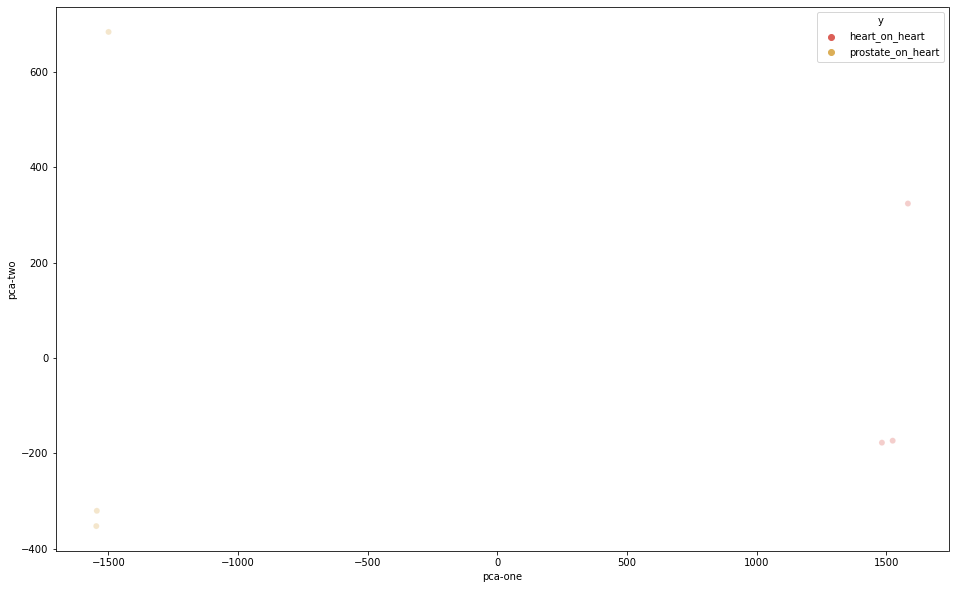

In [90]:
res['y'] = labels
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    palette=sns.color_palette("hls", 10),
    hue="y",
    data=res,
    legend="full",
    alpha=0.3
)

### hippocampus on hippocampus and prostate on hippocampus

In [91]:
prostate_on_hippo = "/home/csgrad/mbhosale/Image_registration/registration_copy/registration/logs/cross_domain_tests/train_prostate_test_hippocampus_04_04_23_15_25/seg_imgs/"
fflow = None
labels = []
fflow, labels = myfun(folder=prostate_on_hippo, fflow=fflow, labels=labels, label="prostate_on_hippo")

In [93]:
hippo_on_hippo = "/home/csgrad/mbhosale/Image_registration/registration_copy/registration/logs/cross_domain_tests/train_hippocampus_test_hippocampus_04_10_23_02_50/seg_imgs/"
fflow, labels = myfun(folder=hippo_on_hippo, fflow=fflow, labels=labels, label="hippo_on_hippo")

In [95]:
pca = PCA(n_components=52)
pca_result = pca.fit_transform(fflow)

res = pd.DataFrame()
res['pca-one'] = pca_result[:,0]
res['pca-two'] = pca_result[:,1] 
res['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [9.2369759e-01 1.2047333e-02 5.7338234e-03 5.2876556e-03 4.4112550e-03
 3.5659592e-03 2.8807884e-03 2.8297268e-03 2.5055718e-03 2.3463268e-03
 2.0179492e-03 1.9468514e-03 1.8506985e-03 1.7267622e-03 1.5903362e-03
 1.4829555e-03 1.4156927e-03 1.3700026e-03 1.3055576e-03 1.2726615e-03
 1.2243749e-03 1.2106616e-03 1.1512561e-03 1.0691080e-03 1.0561356e-03
 9.9799479e-04 9.8154601e-04 9.0397010e-04 8.7469019e-04 8.2153833e-04
 7.7851251e-04 7.5073412e-04 7.1518292e-04 6.7394722e-04 5.7571236e-04
 5.6469673e-04 5.0626625e-04 4.4308620e-04 4.3693319e-04 4.3288321e-04
 3.3380536e-04 3.0766864e-04 2.9796225e-04 2.9488912e-04 2.7803166e-04
 2.1961230e-04 1.9596735e-04 1.9172790e-04 1.8621552e-04 1.2754087e-04
 1.1197896e-04 1.3603324e-10]


<ipython-input-97-84f8c03fd981>:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(


<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

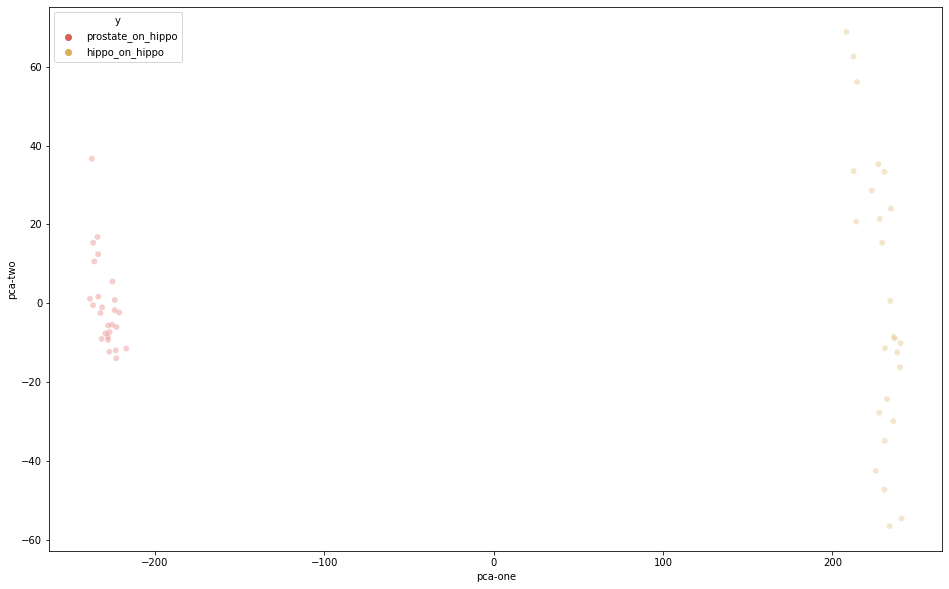

In [97]:
res['y'] = labels
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    palette=sns.color_palette("hls", 10),
    hue="y",
    data=res,
    legend="full",
    alpha=0.3
)

In [129]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=10000)
tsne_results = tsne.fit_transform(fflow)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

/home/csgrad/mbhosale/anaconda3/envs/registration/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/csgrad/mbhosale/anaconda3/envs/registration/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 51 nearest neighbors...
[t-SNE] Indexed 52 samples in 0.009s...
[t-SNE] Computed neighbors for 52 samples in 0.382s...
[t-SNE] Computed conditional probabilities for sample 52 / 52
[t-SNE] Mean sigma: 258.971159
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.229561
[t-SNE] KL divergence after 1700 iterations: 0.434035
t-SNE done! Time elapsed: 3.0453217029571533 seconds


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

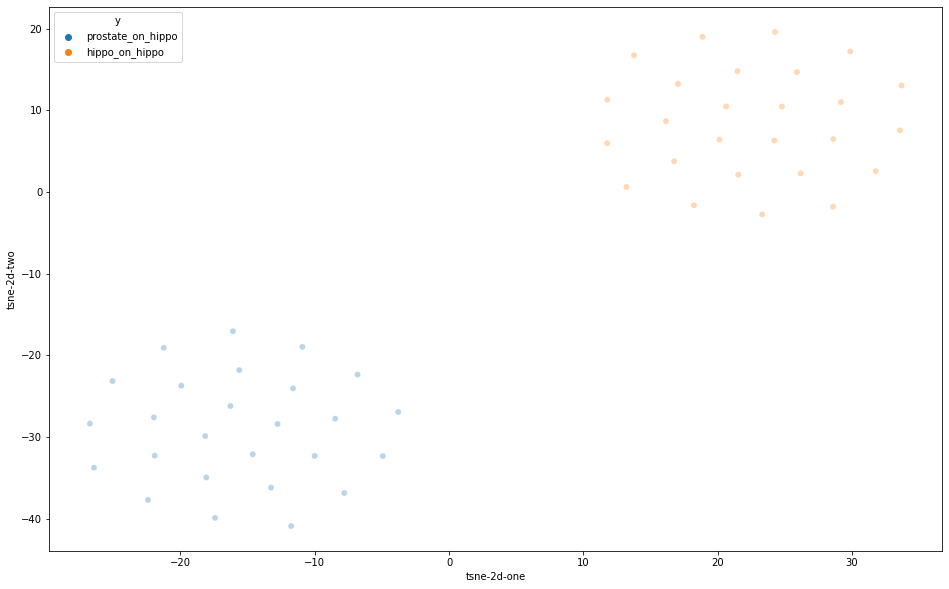

In [130]:
res['tsne-2d-one'] = tsne_results[:,0]
res['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    data=res,
    legend="full",
    alpha=0.3
)

### mix of all cross domian tests by talking only first min(data[i].size()) voxels in the flow.

In [7]:
heart_on_heart = "/home/csgrad/mbhosale/Image_registration/registration_copy/registration/logs/cross_domain_tests/train_heart_test_heart_04_04_23_19_59/seg_imgs/"
hippo_on_hippo = "/home/csgrad/mbhosale/Image_registration/registration_copy/registration/logs/cross_domain_tests/train_hippocampus_test_hippocampus_04_10_23_02_50/seg_imgs/"
prostate_on_hippo = "/home/csgrad/mbhosale/Image_registration/registration_copy/registration/logs/cross_domain_tests/train_prostate_test_hippocampus_04_04_23_15_25/seg_imgs/"
prostate_on_heart = "/home/csgrad/mbhosale/Image_registration/registration_copy/registration/logs/cross_domain_tests/train_prostate_test_heart_04_04_23_21_48/seg_imgs/"
prostate_on_prostate = "/home/csgrad/mbhosale/Image_registration/registration_copy/registration/logs/cross_domain_tests/train_prostate_test_prostate_04_04_23_19_45/seg_imgs"
prostate_on_spleen = "/home/csgrad/mbhosale/Image_registration/registration_copy/registration/logs/cross_domain_tests/train_prostate_test_spleen_04_04_23_21_52/seg_imgs"
spleen_on_spleen = "/home/csgrad/mbhosale/Image_registration/registration_copy/registration/logs/cross_domain_tests/train_spleen_test_spleen_04_05_23_17_14/seg_imgs"

In [8]:
fname = [heart_on_heart, hippo_on_hippo, prostate_on_hippo, prostate_on_heart, prostate_on_prostate, prostate_on_spleen, spleen_on_spleen]
f_labels = ["heart_on_heart", "hippo_on_hippo", "prostate_on_hippo", "prostate_on_heart", "prostate_on_prostate", "prostate_on_spleen", "spleen_on_spleen"]

In [10]:
def myfun2(folder, fflow, labels, label, size):
    for f in os.listdir(folder):
        if f.endswith(".nii.gz") and "flow" in f:
            flow = np.array(nibabel.load(os.path.join(folder, f)).get_fdata(), dtype='float32')
            flow = np.squeeze(flow)
            flow = flow.flatten()
            flow = flow[:size]
            flow = flow.reshape(1, flow.shape[0])
            labels.append(label)
            if fflow is None:
                fflow = flow
            else:
                fflow = np.append(fflow, flow, axis=0)
    return fflow, labels

In [12]:
fflow=None
labels = []
for i in range(0, len(fname)):
    fflow, labels = myfun2(folder=fname[i], fflow=fflow, labels=labels, label=f_labels[i], size=147456)

In [14]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=10000)
tsne_results = tsne.fit_transform(fflow)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

/home/csgrad/mbhosale/anaconda3/envs/registration/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/csgrad/mbhosale/anaconda3/envs/registration/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 79 nearest neighbors...
[t-SNE] Indexed 80 samples in 0.005s...
[t-SNE] Computed neighbors for 80 samples in 0.530s...
[t-SNE] Computed conditional probabilities for sample 80 / 80
[t-SNE] Mean sigma: 30.916801
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.549660
[t-SNE] KL divergence after 1450 iterations: 0.027510
t-SNE done! Time elapsed: 1.8971879482269287 seconds


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

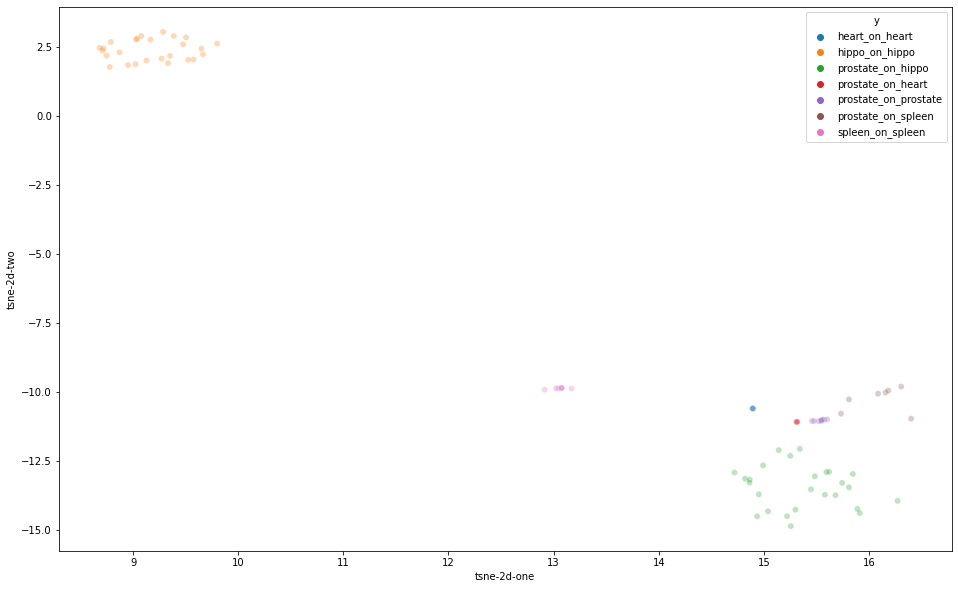

In [17]:
res = pd.DataFrame()
res['y'] = labels
res['tsne-2d-one'] = tsne_results[:,0]
res['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    data=res,
    legend="full",
    alpha=0.3
)

### Similarly, lets look at the encoding of the unet.

In [35]:
def myfun3(folder, fflow, labels, label, size):
    for f in os.listdir(folder):
        if f.endswith(".nii.gz") and "enc" in f:
            # print(os.path.join(folder, f))
            flow = np.array(nibabel.load(os.path.join(folder, f)).get_fdata(), dtype='float32')
            flow = np.squeeze(flow)
            flow = flow.flatten()
            if size != 0:
                flow = flow[:size]
            flow = flow.reshape(1, flow.shape[0])
            labels.append(label)
            if fflow is None:
                fflow = flow
            else:
                fflow = np.append(fflow, flow, axis=0)
            # print(label)
    return fflow, labels

In [26]:
fflow, labels = myfun3(folder="/home/csgrad/mbhosale/Image_registration/registration_copy/registration/logs/cross_domain_tests/train_hippocampus_test_hippocampus_04_11_23_20_59/seg_imgs", fflow=None, labels=[], label="hippo_on_hippo", size=0)

In [27]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=10000)
tsne_results = tsne.fit_transform(fflow)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

/home/csgrad/mbhosale/anaconda3/envs/registration/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/csgrad/mbhosale/anaconda3/envs/registration/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 25 nearest neighbors...
[t-SNE] Indexed 26 samples in 0.000s...
[t-SNE] Computed neighbors for 26 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 26 / 26
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.351521
[t-SNE] KL divergence after 1150 iterations: 0.464518
t-SNE done! Time elapsed: 1.0288753509521484 seconds


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

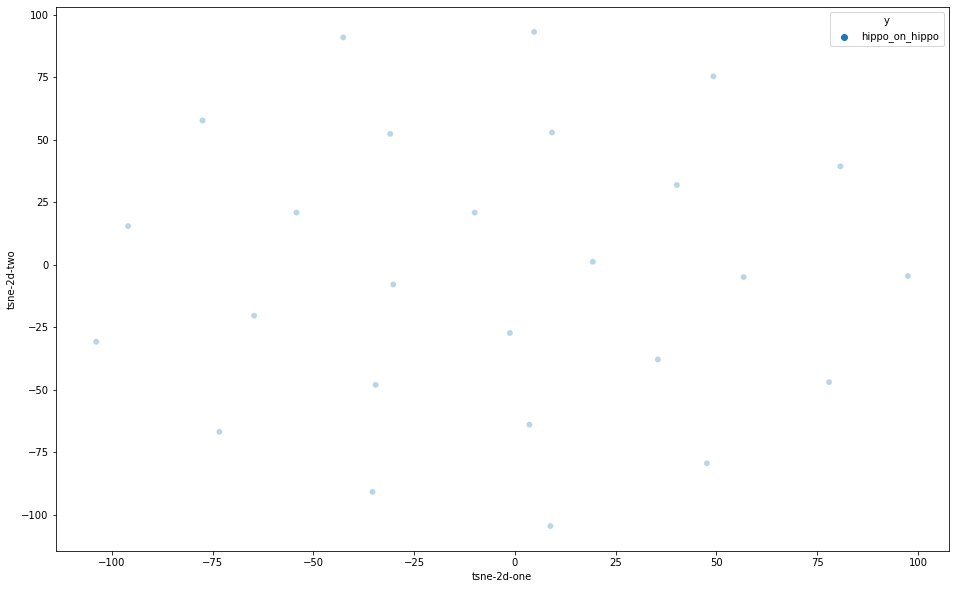

In [28]:
res = pd.DataFrame()
res['y'] = labels
res['tsne-2d-one'] = tsne_results[:,0]
res['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    data=res,
    legend="full",
    alpha=0.3
)

In [55]:
spleen_on_spleen = "/home/csgrad/mbhosale/Image_registration/registration_copy/registration/logs/cross_domain_tests/train_spleen_test_spleen_04_12_23_01_15/seg_imgs"
heart_on_spleen = "/home/csgrad/mbhosale/Image_registration/registration_copy/registration/logs/cross_domain_tests/train_heart_test_spleen_04_12_23_01_09/seg_imgs"

In [56]:
fname = [spleen_on_spleen,  heart_on_spleen]
f_labels = ["spleen_on_spleen",  "heart_on_spleen"]

In [57]:
fflow=None
labels = []
for i in range(0, len(fname)):
    fflow, labels = myfun3(folder=fname[i], fflow=fflow, labels=labels, label=f_labels[i], size=0)

In [72]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=20, n_iter=10000)
tsne_results = tsne.fit_transform(fflow)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

/home/csgrad/mbhosale/anaconda3/envs/registration/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/csgrad/mbhosale/anaconda3/envs/registration/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 13 nearest neighbors...
[t-SNE] Indexed 14 samples in 0.001s...
[t-SNE] Computed neighbors for 14 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 14 / 14
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.559052
[t-SNE] KL divergence after 950 iterations: 0.327202
t-SNE done! Time elapsed: 0.6640419960021973 seconds


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

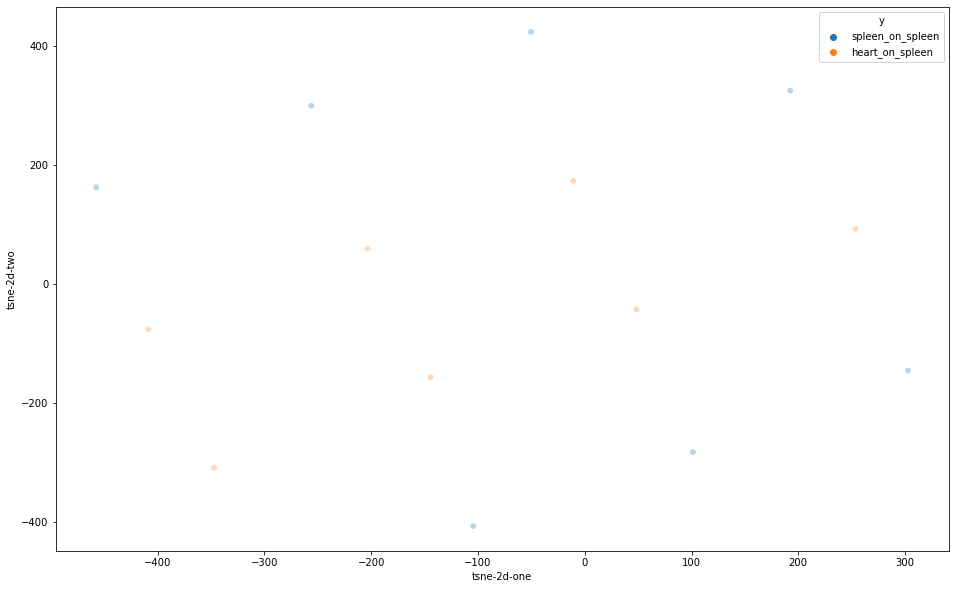

In [73]:
res = pd.DataFrame()
res['y'] = labels
res['tsne-2d-one'] = tsne_results[:,0]
res['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    data=res,
    legend="full",
    alpha=0.3
)

#### Lets look at it with UMAP visualization.

In [62]:
import umap
reducer = umap.UMAP()
umap_results = reducer.fit_transform(fflow)

/home/csgrad/mbhosale/anaconda3/envs/registration/lib/python3.8/site-packages/umap/umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


<AxesSubplot:xlabel='umap-2d-one', ylabel='umap-2d-two'>

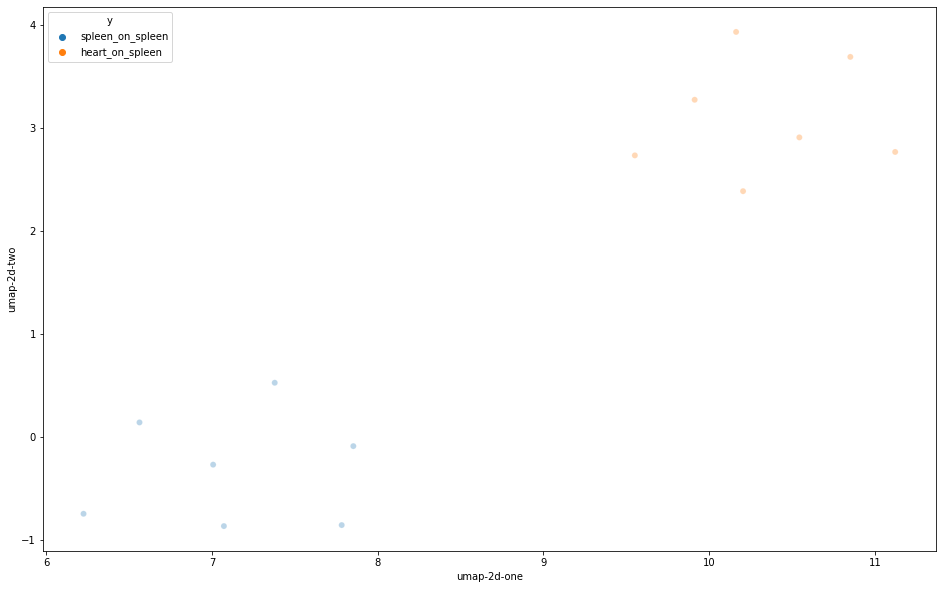

In [63]:
res = pd.DataFrame()
res['y'] = labels
res['umap-2d-one'] = umap_results[:,0]
res['umap-2d-two'] = umap_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="umap-2d-one", y="umap-2d-two",
    hue="y",
    data=res,
    legend="full",
    alpha=0.3
)

In [74]:
hippo_on_hippo = "/home/csgrad/mbhosale/Image_registration/registration_copy/registration/logs/cross_domain_tests/train_hippocampus_test_hippocampus_04_11_23_20_59/seg_imgs"
heart_on_hippo = "/home/csgrad/mbhosale/Image_registration/registration_copy/registration/logs/cross_domain_tests/train_heart_test_hippocampus_04_12_23_01_04/seg_imgs"

In [75]:
fname = [hippo_on_hippo, heart_on_hippo]
f_labels = ["hippo_on_hippo", "heart_on_hippo"]

In [76]:
fflow=None
labels = []
for i in range(0, len(fname)):
    fflow, labels = myfun3(folder=fname[i], fflow=fflow, labels=labels, label=f_labels[i], size=0)

In [44]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=10000)
tsne_results = tsne.fit_transform(fflow)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

/home/csgrad/mbhosale/anaconda3/envs/registration/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/csgrad/mbhosale/anaconda3/envs/registration/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 51 nearest neighbors...
[t-SNE] Indexed 52 samples in 0.000s...
[t-SNE] Computed neighbors for 52 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 52 / 52
[t-SNE] Mean sigma: 0.572256
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.912804
[t-SNE] KL divergence after 2000 iterations: 0.371465
t-SNE done! Time elapsed: 1.1924664974212646 seconds


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

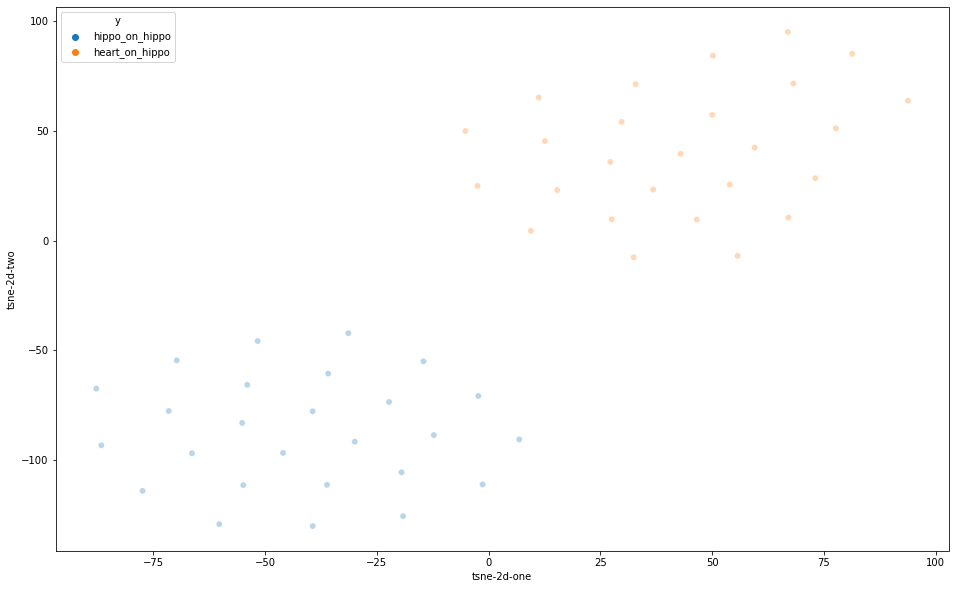

In [45]:
res = pd.DataFrame()
res['y'] = labels
res['tsne-2d-one'] = tsne_results[:,0]
res['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    data=res,
    legend="full",
    alpha=0.3
)

In [77]:
import umap
reducer = umap.UMAP()
umap_results = reducer.fit_transform(fflow)

<AxesSubplot:xlabel='umap-2d-one', ylabel='umap-2d-two'>

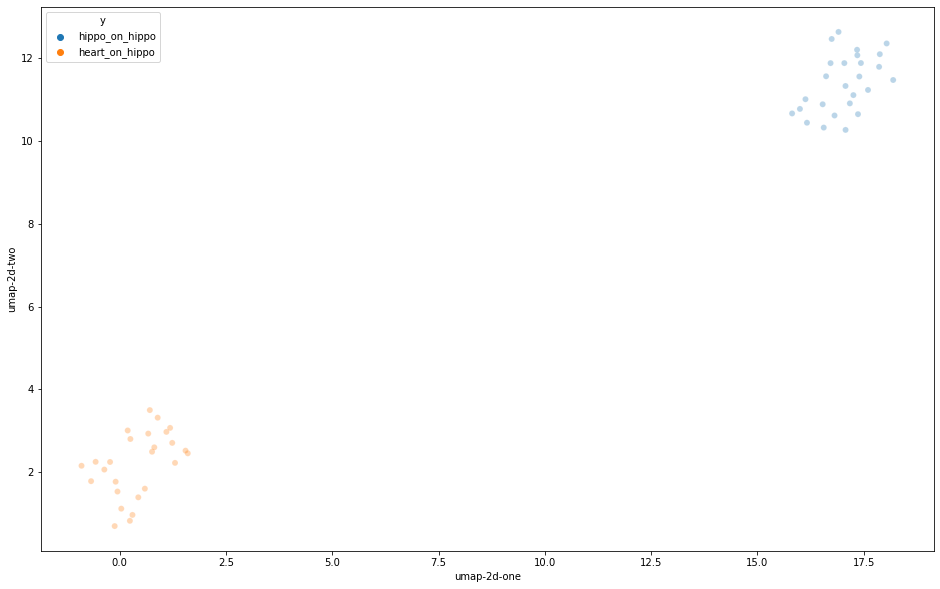

In [78]:
res = pd.DataFrame()
res['y'] = labels
res['umap-2d-one'] = umap_results[:,0]
res['umap-2d-two'] = umap_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="umap-2d-one", y="umap-2d-two",
    hue="y",
    data=res,
    legend="full",
    alpha=0.3
)

In [79]:
prostate_on_prostate = "/home/csgrad/mbhosale/Image_registration/registration_copy/registration/logs/cross_domain_tests/train_prostate_test_prostate_04_12_23_00_57/seg_imgs"
heart_on_prostate = "/home/csgrad/mbhosale/Image_registration/registration_copy/registration/logs/cross_domain_tests/train_heart_test_prostate_04_12_23_01_05/seg_imgs"
fname = [prostate_on_prostate, heart_on_prostate]
f_labels = ["prostet_on_prostate", "heart_on_prostate"]

In [80]:
fflow=None
labels = []
for i in range(0, len(fname)):
    fflow, labels = myfun3(folder=fname[i], fflow=fflow, labels=labels, label=f_labels[i], size=0)

In [49]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=10000)
tsne_results = tsne.fit_transform(fflow)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

/home/csgrad/mbhosale/anaconda3/envs/registration/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/csgrad/mbhosale/anaconda3/envs/registration/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 15 nearest neighbors...
[t-SNE] Indexed 16 samples in 0.000s...
[t-SNE] Computed neighbors for 16 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 16 / 16
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.261307
[t-SNE] KL divergence after 750 iterations: 0.354004
t-SNE done! Time elapsed: 0.41452765464782715 seconds


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

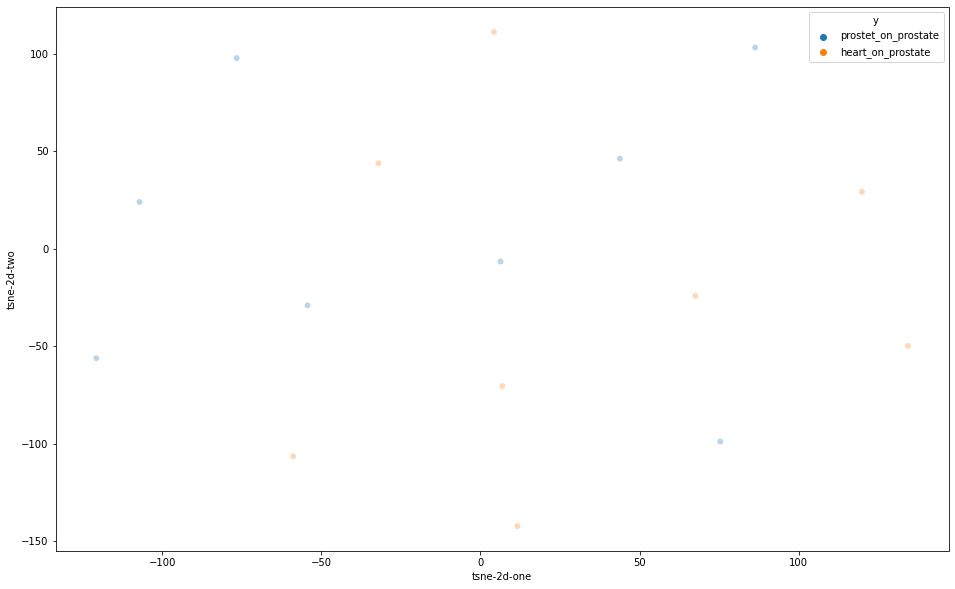

In [50]:
res = pd.DataFrame()
res['y'] = labels
res['tsne-2d-one'] = tsne_results[:,0]
res['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    data=res,
    legend="full",
    alpha=0.3
)

In [81]:
import umap
reducer = umap.UMAP()
umap_results = reducer.fit_transform(fflow)

<AxesSubplot:xlabel='umap-2d-one', ylabel='umap-2d-two'>

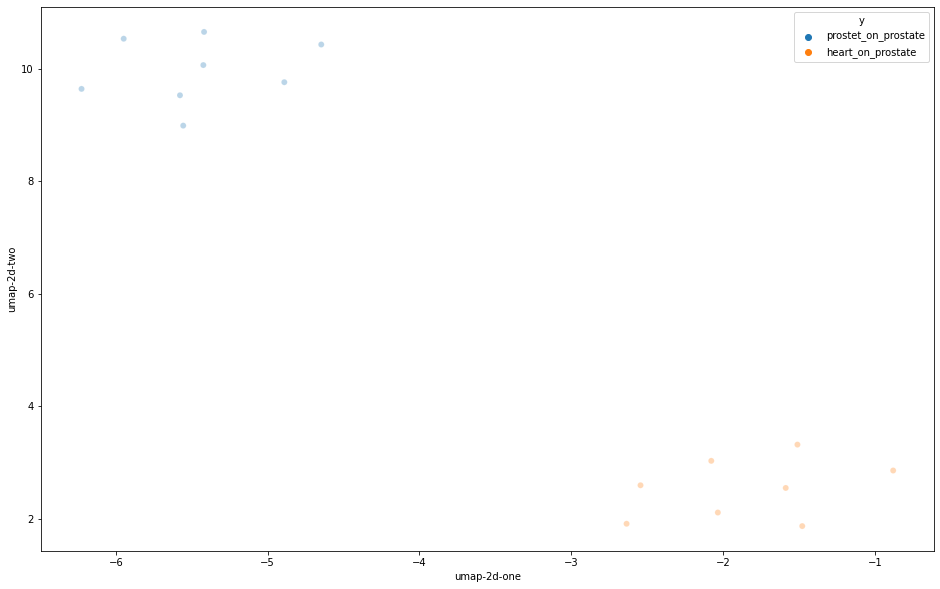

In [82]:
res = pd.DataFrame()
res['y'] = labels
res['umap-2d-one'] = umap_results[:,0]
res['umap-2d-two'] = umap_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="umap-2d-one", y="umap-2d-two",
    hue="y",
    data=res,
    legend="full",
    alpha=0.3
)

In [83]:
spleen_on_spleen = "/home/csgrad/mbhosale/Image_registration/registration_copy/registration/logs/cross_domain_tests/train_spleen_test_spleen_04_12_23_01_15/seg_imgs"
heart_on_spleen = "/home/csgrad/mbhosale/Image_registration/registration_copy/registration/logs/cross_domain_tests/train_heart_test_spleen_04_12_23_01_09/seg_imgs"
hippo_on_hippo = "/home/csgrad/mbhosale/Image_registration/registration_copy/registration/logs/cross_domain_tests/train_hippocampus_test_hippocampus_04_11_23_20_59/seg_imgs"
heart_on_hippo = "/home/csgrad/mbhosale/Image_registration/registration_copy/registration/logs/cross_domain_tests/train_heart_test_hippocampus_04_12_23_01_04/seg_imgs"
prostate_on_prostate = "/home/csgrad/mbhosale/Image_registration/registration_copy/registration/logs/cross_domain_tests/train_prostate_test_prostate_04_12_23_00_57/seg_imgs"
heart_on_prostate = "/home/csgrad/mbhosale/Image_registration/registration_copy/registration/logs/cross_domain_tests/train_heart_test_prostate_04_12_23_01_05/seg_imgs"
fname = [spleen_on_spleen, heart_on_spleen, hippo_on_hippo, heart_on_hippo, prostate_on_prostate, heart_on_prostate]
f_labels = ["spleen_on_spleen", "heart_on_spleen", "hippo_on_hippo", "heart_on_hippo", "prostet_on_prostate", "heart_on_prostate"]
fflow=None
labels = []
for i in range(0, len(fname)):
    fflow, labels = myfun3(folder=fname[i], fflow=fflow, labels=labels, label=f_labels[i], size=1152)

In [53]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=10000)
tsne_results = tsne.fit_transform(fflow)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

/home/csgrad/mbhosale/anaconda3/envs/registration/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/csgrad/mbhosale/anaconda3/envs/registration/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 81 nearest neighbors...
[t-SNE] Indexed 82 samples in 0.001s...
[t-SNE] Computed neighbors for 82 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 82 / 82
[t-SNE] Mean sigma: 0.503906
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.055180
[t-SNE] KL divergence after 2900 iterations: 0.028884
t-SNE done! Time elapsed: 2.3284006118774414 seconds


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

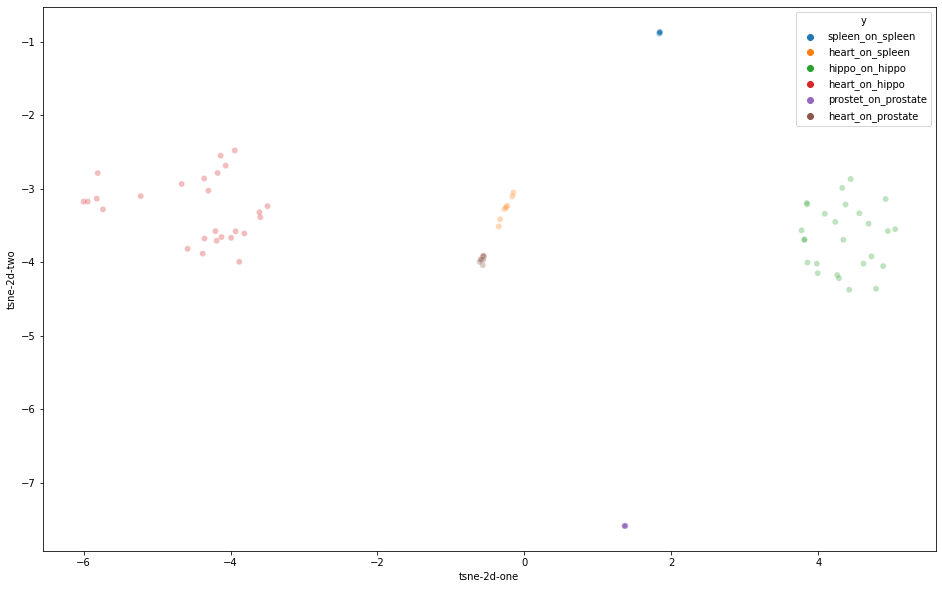

In [54]:
res = pd.DataFrame()
res['y'] = labels
res['tsne-2d-one'] = tsne_results[:,0]
res['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    data=res,
    legend="full",
    alpha=0.3
)

In [88]:
import umap
reducer = umap.UMAP()
umap_results = reducer.fit_transform(fflow)

<AxesSubplot:xlabel='umap-2d-one', ylabel='umap-2d-two'>

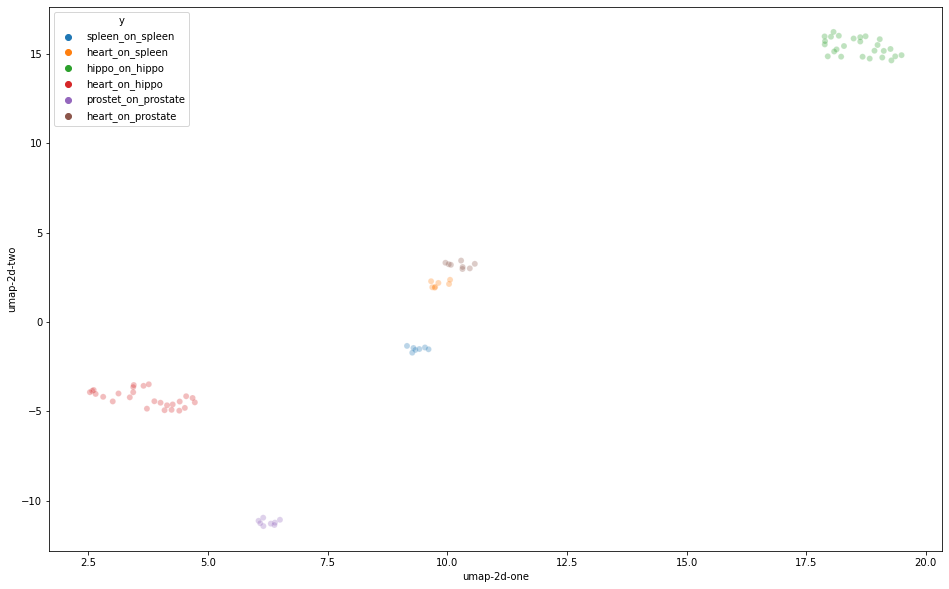

In [89]:
res = pd.DataFrame()
res['y'] = labels
res['umap-2d-one'] = umap_results[:,0]
res['umap-2d-two'] = umap_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="umap-2d-one", y="umap-2d-two",
    hue="y",
    data=res,
    legend="full",
    alpha=0.3
)